# 회귀분석 Notebook

In [58]:
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

In [59]:
data_table = pd.read_csv('SNSB_1_figure_new.csv')

In [60]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              2205 non-null   int64  
 1   sex                              2205 non-null   int64  
 2   edu_years                        2205 non-null   float64
 3   Rey_CFT_copy_score               2205 non-null   int64  
 4   Alternating_square_and_triangle  2205 non-null   int64  
 5   Luria_loop                       2205 non-null   int64  
 6   K_MMSE_drawing                   2205 non-null   int64  
 7   K_TMT_E_A_success                2205 non-null   int64  
 8   K_TMT_E_B_success                2205 non-null   int64  
 9   CDR                              2205 non-null   float64
 10  Sum_of_boxes                     2205 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 189.6 KB


In [61]:
data_table.drop(['CDR'], axis=1, inplace=True)

In [62]:
data_table.tail(10)

,Age,sex,edu_years,Rey_CFT_copy_score,Alternating_square_and_triangle,Luria_loop,K_MMSE_drawing,K_TMT_E_A_success,K_TMT_E_B_success,Sum_of_boxes
2195,83,0,0.0,0,0,0,0,1,1,10.0
2196,57,1,16.0,35,1,1,1,1,1,1.5
2197,75,1,12.0,7,0,1,0,1,0,6.0
2198,74,0,9.0,29,1,1,1,1,1,1.5
2199,60,0,6.0,31,1,1,1,1,1,1.5
2200,71,0,6.0,2,0,0,0,1,1,4.5
2201,70,0,6.0,14,0,0,0,1,1,4.5
2202,80,0,4.0,31,1,1,1,1,0,10.0
2203,48,0,9.0,32,1,1,1,1,1,2.0
2204,49,0,9.0,28,1,1,1,1,1,2.5


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = data_table['Sum_of_boxes']
X_data = data_table.drop(['Sum_of_boxes'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)

## 릿지

- Ridge 회귀는 선형 회귀에 L2 Regularization을 추가한 모형이다.  
- Ridge 회귀는 L2 Regularization을 적용하는데, L2 Regularization은 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소 시키기 위해서 회귀 계수값을 더 작게 만드는 Regularization 모형이다.

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0, 1, 10, 100, 200]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 100)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print("평균 RMSE : {0:.5f}".format(avg_rmse))

평균 RMSE : 1.73677
평균 RMSE : 1.73670
평균 RMSE : 1.73620
평균 RMSE : 1.73578
평균 RMSE : 1.73778


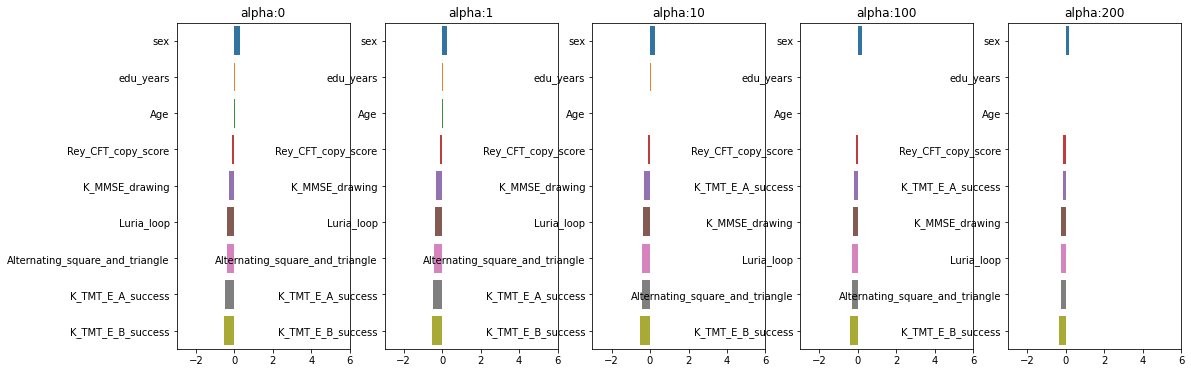

In [8]:
#각 alpha에 따른 회귀 계수 시각화
fit, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame() # 회귀 계수 값 저장을 위한 DataFrame 생성

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [9]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:1,alpha:10,alpha:100,alpha:200
sex,0.264874,0.264156,0.257975,0.211976,0.178200
edu_years,0.034574,0.034566,0.034492,0.033717,0.033069
Age,0.020783,0.020787,0.020829,0.021281,0.021668
Rey_CFT_copy_score,-0.100785,-0.100899,-0.101891,-0.109248,-0.114393
K_MMSE_drawing,-0.305725,-0.305133,-0.299896,-0.254600,-0.216570
Luria_loop,-0.373083,-0.372213,-0.364258,-0.293209,-0.238976
Alternating_square_and_triangle,-0.409440,-0.408333,-0.398206,-0.310657,-0.247907
K_TMT_E_A_success,-0.477361,-0.470426,-0.417119,-0.211405,-0.143909
K_TMT_E_B_success,-0.517611,-0.516679,-0.507834,-0.419341,-0.347261


## 라쏘
- Lasso 회귀는 선형 회귀에 L1 Regularization을 적용한 방식이다.  
- L2 Regularization이 회귀 계수 값의 크기를 줄이는 데 반해, L1 Regularization은 예측 영향력이 작은 피처의 회귀계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다.  
- 이러한 특성 때문에 L1 Regularization은 피처 선택 기능으로도 불린다.

In [10]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [11]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.01, 0.02, 0.03, 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.01일 때 5 폴드 세트의 평균 RMSE: 1.829 
alpha 0.02일 때 5 폴드 세트의 평균 RMSE: 1.831 
alpha 0.03일 때 5 폴드 세트의 평균 RMSE: 1.836 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1.853 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.854 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1.855 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.857 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.883 


In [12]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.01,alpha:0.02,alpha:0.03,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
sex,0.211980,0.161576,0.113483,0.000000,0.000000,0.000000,0.000000,0.000000
edu_years,0.033901,0.033118,0.032225,0.027802,0.025426,0.001063,0.000000,-0.000000
Age,0.020719,0.020728,0.020804,0.021615,0.022517,0.017946,0.013956,0.000000
Rey_CFT_copy_score,-0.106992,-0.112840,-0.118366,-0.134651,-0.135789,-0.127561,-0.123593,-0.108107
K_TMT_E_A_success,-0.153667,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
K_MMSE_drawing,-0.255785,-0.206065,-0.156503,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Luria_loop,-0.317924,-0.256136,-0.188298,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Alternating_square_and_triangle,-0.351856,-0.283938,-0.206640,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
K_TMT_E_B_success,-0.481580,-0.432235,-0.370843,-0.128009,-0.000000,-0.000000,-0.000000,-0.000000


## 엘라스틱넷
- L2, L1 Regularization을 함께 결합한 모형이다. 
- 주로 피처가 많은 데이터 세트에서 적용되며, L1 Regularization으로 피처의 개수를 줄임과 동시에 L2 Regularization으로 계수의 값의 크기를 조정한다.

In [13]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.01, 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.01일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1.846 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.853 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1.854 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.856 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.871 


In [14]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.01,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
sex,0.224114,0.020001,0.000000,0.000000,0.000000,0.000000
edu_years,0.034035,0.030252,0.027635,0.009919,0.000000,0.000000
Age,0.020778,0.021188,0.021807,0.019677,0.016385,0.005602
Rey_CFT_copy_score,-0.105760,-0.129739,-0.134860,-0.130384,-0.125444,-0.114268
K_TMT_E_A_success,-0.231888,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
K_MMSE_drawing,-0.267403,-0.057561,-0.000000,-0.000000,-0.000000,-0.000000
Luria_loop,-0.328548,-0.052424,-0.000000,-0.000000,-0.000000,-0.000000
Alternating_square_and_triangle,-0.361294,-0.050550,-0.000000,-0.000000,-0.000000,-0.000000
K_TMT_E_B_success,-0.484719,-0.225222,-0.108416,-0.000000,-0.000000,-0.000000


## 데이터 변환 후 릿지, 라쏘, 엘라스틱넷

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

### 릿지 Test

In [18]:
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.827 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1.826 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 1.828 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1.829 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 1.832 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.769 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.760 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.759 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1.755 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 1.755 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.830 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1.870 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 1.899 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.757 
alpha 1일 때 5 폴드 세트의 평균 

### 라쏘 Test

In [19]:
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Lasso', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.857 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.113 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.117 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.760 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.120 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.760 
alpha 1일 때 5 폴드 세트의 평균 

### 엘라스틱넷 Test

In [20]:
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('ElasticNet', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.856 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.995 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.053 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.760 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.035 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.828 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 2.325 
alpha 200일 때 5 폴드 세트의 평균 RMSE: 2.325 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.760 
alpha 1일 때 5 폴드 세트의 평균 

평균적으로 릿지의 성능이 가장 좋다! 피처의 개수가 많지 않기 때문. 회귀계수를 0으로 조정해 피처를 무시해버리는 L1 규제는 적합하지 않아보인다.

## 회귀 트리 방식

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_data_scaled = get_scaled_data(method='MinMax', p_degree=2, input_data=X_data)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data_scaled, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [22]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 1.835 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 1.770 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 1.897 


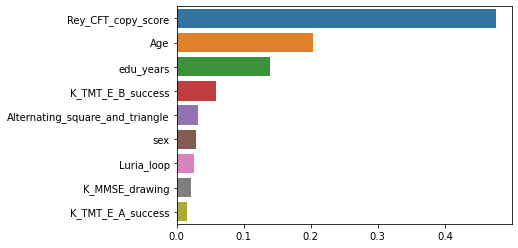

In [26]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


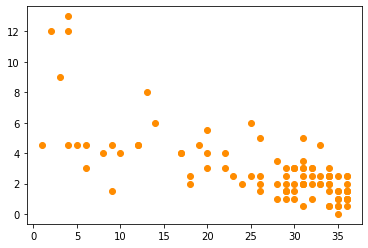

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

data_table_sample = data_table[['Rey_CFT_copy_score','Sum_of_boxes']]
data_table_sample = data_table_sample.sample(n=100,random_state=0)
print(data_table_sample.shape)
plt.figure()
plt.scatter(data_table_sample.Rey_CFT_copy_score , data_table_sample.Sum_of_boxes,c="darkorange")

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg1 = DecisionTreeRegressor(max_depth=1)
rf_reg2 = DecisionTreeRegressor(max_depth=2)

# 실제 예측을 적용할 테스트용 데이터 셋을 0 ~ 35 까지 100개 데이터 셋 생성. 
X_test = np.arange(0, 35, 0.05).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = data_table_sample['Rey_CFT_copy_score'].values.reshape(-1,1)
y_target = data_table_sample['Sum_of_boxes'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg1.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf1 = rf_reg1.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)

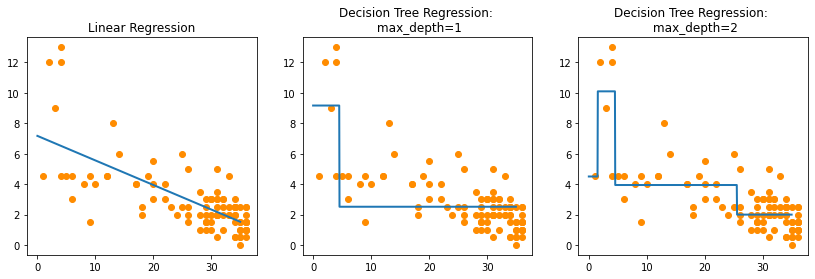

In [47]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(data_table_sample.Rey_CFT_copy_score, data_table_sample.Sum_of_boxes, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=1')
ax2.scatter(data_table_sample.Rey_CFT_copy_score, data_table_sample.Sum_of_boxes, c="darkorange")
ax2.plot(X_test, pred_rf1, label="max_depth:1", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=2')
ax3.scatter(data_table_sample.Rey_CFT_copy_score, data_table_sample.Sum_of_boxes, c="darkorange")
ax3.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2)